# Pandas Assignment

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [3]:

data=np.random.rand(5,3)
df=pd.DataFrame(data)
print(df)

          0         1         2
0  0.227577  0.233657  0.071173
1  0.109768  0.025886  0.955130
2  0.679999  0.772059  0.807517
3  0.331903  0.177042  0.757498
4  0.054316  0.013370  0.721877


**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

by default it starts from 0 and accordingly assigns numbers as the labels for the columns and rows

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [4]:
w=np.random.rand(5)
g=np.random.rand(5)
e=np.random.rand(5)

r={"january":w,"february":e,"march":g}
f=pd.DataFrame(r,index=['Houston','chicago','new york city','los angeles','phoenix'])
print(f)


                january  february     march
Houston        0.770202  0.483630  0.974065
chicago        0.645769  0.529484  0.131064
new york city  0.509769  0.086108  0.120893
los angeles    0.202472  0.127245  0.658556
phoenix        0.787908  0.752595  0.667118


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [6]:

data=pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df_homes=pd.DataFrame(data)
print(df_homes)

     RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0      102001         0    United States    country       NaN  121365.463017   
1      394913         1     New York, NY        msa        NY  217048.914950   
2      753899         2  Los Angeles, CA        msa        CA  218336.580065   
3      394463         3      Chicago, IL        msa        IL  151721.660042   
4      394514         4       Dallas, TX        msa        TX  126887.587653   
..        ...       ...              ...        ...       ...            ...   
890    753929       935       Zapata, TX        msa        TX            NaN   
891    394743       936    Ketchikan, AK        msa        AK            NaN   
892    753874       937        Craig, CO        msa        CO   98629.019558   
893    395188       938       Vernon, TX        msa        TX            NaN   
894    394767       939       Lamesa, TX        msa        TX            NaN   

        2000-02-29     2000-03-31     2

**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [7]:
df_homes.to_csv("zillow_home_data.csv")


**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [8]:
df_homes_2=pd.DataFrame(pd.read_csv("zillow_home_data.csv"))

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [9]:
print(df_homes.shape,df_homes_2.shape)


(895, 316) (895, 317)


the dimensions are not same in the column part this is because the column with index which was created during the conversion from csv to dataframe was considered as a real column now during the conversion from dataframe to csv, to avoid this (index=False)

**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [10]:
s=pd.read_excel("AnalyticsSnapshot.xlsx",sheet_name="February 2022",index_col=0)
feb=pd.DataFrame(s)
print(feb)

            This Month  Last Month  Month to Month Increase
Users             1800         280                 5.428571
New Users         1700         298                 4.704698
Page Views        2534         436                 4.811927


**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [11]:
feb["percentage increase"]=(feb['This Month']-feb['Last Month'])/feb['Last Month']*100
print(feb)

            This Month  Last Month  Month to Month Increase  \
Users             1800         280                 5.428571   
New Users         1700         298                 4.704698   
Page Views        2534         436                 4.811927   

            percentage increase  
Users                542.857143  
New Users            470.469799  
Page Views           481.192661  


## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [13]:
df_penguins = sb.load_dataset('penguins')


**12.** Write the code to show the the number of rows and columns in df_penguins

In [14]:
print(df_penguins.shape)

(344, 7)


**13.** How might you show the first few rows of df_penguins?

In [15]:
n=int(input("enter the row till which u want to print"))
print(df_penguins.head(n+1))
#or
print(df_penguins.iloc[:n+1])
#or
for i in range(n+1):
  print(df_penguins.loc[i])

enter the row till which u want to print5
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3      

**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [16]:
print(df_penguins['species'].unique())
print(df_penguins['species'].nunique())

['Adelie' 'Chinstrap' 'Gentoo']
3


**15.** What function can we use to drop the rows that have missing data?

In [17]:
print(df_penguins.dropna())

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

**16.** By default, will this modify df_penguins or will it return a copy?

it only returns a copy of the original dataframe with certain rows dropped the original dataframe remains unchanged

**17.** How can we override the default?

either we can save the copy in place of the real dataframe(df_penguins=df_penguins.dropna() or we can say
df_penguins(inplace=True) this gives a modified version of the real dataframe

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [18]:
df_penguins_full=df_penguins.dropna()
print(df_penguins_full)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [19]:
avgbill=df_penguins_full['bill_length_mm'].mean()
print(avgbill)

43.99279279279279


**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

In [20]:
print(df_penguins_full['body_mass_g'].corr(df_penguins_full['flipper_length_mm']))
print(df_penguins_full['body_mass_g'].corr(df_penguins_full['bill_depth_mm']))
print(df_penguins_full['flipper_length_mm'].corr(df_penguins_full['bill_depth_mm']))

0.8729788985653611
-0.47201566019513935
-0.5777916963366723


we corelate the columns using the .corr() and then more positive the value is more corelated they are that when one inc the other also inc to that degree and same goes for negative as well but then in an opp way

**21.** How could you show the median flipper length, grouped by species?

In [21]:
Mfl=df_penguins_full['flipper_length_mm'].median()
print(Mfl)

197.0


**22.** Which species has the longest flippers?

In [22]:
print(df_penguins_full.groupby('species')['flipper_length_mm'].mean())

species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64


species gentoo has the longest flippers

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

In [24]:
print(df_penguins_full.groupby('species')['body_mass_g'].mean())

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64


species adelie and chinstrap have the most similar mean weight

**24.** How could you sort the rows by bill length?

In [27]:
print(df_penguins_full.sort_values(by='bill_length_mm').to_string())

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
142     Adelie      Dream            32.1           15.5              188.0       3050.0  Female
98      Adelie      Dream            33.1           16.1              178.0       2900.0  Female
70      Adelie  Torgersen            33.5           19.0              190.0       3600.0  Female
92      Adelie      Dream            34.0           17.1              185.0       3400.0  Female
18      Adelie  Torgersen            34.4           18.4              184.0       3325.0  Female
54      Adelie     Biscoe            34.5           18.1              187.0       2900.0  Female
14      Adelie  Torgersen            34.6           21.1              198.0       4400.0    Male
80      Adelie  Torgersen            34.6           17.2              189.0       3200.0  Female
52      Adelie     Biscoe            35.0           17.9              190.0       3450.0  Female
100     Adelie     Biscoe     

**25.** How could you run the same sort in descending order?

In [28]:
df_penguins_full.sort_values(by='species',ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,Female
251,Gentoo,Biscoe,42.8,14.2,209.0,4700.0,Female
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,Female
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
...,...,...,...,...,...,...,...
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,Female
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,Male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,Male


**26.** How could you sort by species first, then by body mass?

In [29]:
df_penguins_full.sort_values(by=['species','bill_length_mm'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
...,...,...,...,...,...,...,...
327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,Male
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male


## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [30]:
diamonds=sb.load_dataset('diamonds')
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


**28.** Display the columns that are available.

In [34]:
print(diamonds.columns)
#or
print(list(diamonds.columns))

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

In [39]:
l=diamonds['price']
p=diamonds.price
j=diamonds[['price']]
print(type(l),type(p),type(j))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


the first two lines return the column as a series but the third one returns it in a dataframe

**30.** Select the 'table' column and show its type

In [42]:
print(diamonds.table)
print(type(diamonds.table))

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64
<class 'pandas.core.series.Series'>


**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [44]:
subset=diamonds[['price','carat']].head(10)
print(subset)

   price  carat
0    326   0.23
1    326   0.21
2    327   0.23
3    334   0.29
4    335   0.31
5    336   0.24
6    336   0.24
7    337   0.26
8    337   0.22
9    338   0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [47]:
print(diamonds['price'].dtype)

int64


**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [53]:
row=diamonds.loc[0]
print(row)

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object


**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [57]:
row=diamonds.loc[0]
print(type(row))
print(row)

<class 'pandas.core.series.Series'>
carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [58]:
row33=diamonds.loc[33]
print(row33)

carat           0.23
cut        Very Good
color              E
clarity          VS1
depth           59.5
table           58.0
price            402
x               4.01
y               4.06
z                2.4
Name: 33, dtype: object


**36.** Select the row with the highest priced diamond.

In [59]:
print(diamonds.nlargest(1,'price'))

       carat      cut color clarity  depth  table  price    x     y     z
27749   2.29  Premium     I     VS2   60.8   60.0  18823  8.5  8.47  5.16


**37.** Select the row with the lowest priced diamond.

In [60]:
print(diamonds.nsmallest(1,'price'))

   carat    cut color clarity  depth  table  price     x     y     z
0   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43


## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [65]:
taxis=sb.load_dataset('taxis')
print(taxis)

                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [67]:
taxis['pickup_time']=pd.to_datetime(taxis['pickup'])
print(taxis)

                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [73]:
taxis_one_day=taxis[(taxis['pickup_time']>='2019-03-23 00:06:00') & (taxis['pickup_time']<'2019-03-24 00:00:00')]
print(taxis_one_day)


                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
8    2019-03-23 11:48:50 2019-03-23 12:06:14           1      3.63  15.0   
17   2019-03-23 20:50:49 2019-03-23 21:02:07           1      2.60  10.5   
117  2019-03-23 09:39:25 2019-03-23 09:56:45           0      3.60  15.5   
144  2019-03-23 18:35:01 2019-03-23 18:47:39           1      3.20  12.5   
...                  ...                 ...         ...       ...   ...   
6325 2019-03-23 20:52:40 2019-03-23 21:10:12           1      3.62  14.5   
6331 2019-03-23 11:27:00 2019-03-23 12:20:11           1      7.67  28.0   
6338 2019-03-23 18:05:38 2019-03-23 18:25:36           1      2.82  14.0   
6427 2019-03-23 18:26:09 2019-03-23 18:49:12           1      7.07  20.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   

       tip  tolls  total   color      payment                     pickup_zone  \
0     

**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [76]:
df_means=taxis_one_day.set_index('pickup_time').resample('1H').mean(numeric_only=True)
print(df_means)

                     passengers  distance       fare       tip     tolls  \
pickup_time                                                                
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000  0.000000   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000  0.000000   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818  0.000000   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000  0.000000   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000  0.000000   
2019-03-23 05:00:00    2.000000  1.270000   6.000000  0.980000  0.000000   
2019-03-23 06:00:00    1.000000  0.400000  21.500000  0.000000  0.000000   
2019-03-23 07:00:00    2.333333  0.980000   5.250000  1.165000  0.000000   
2019-03-23 08:00:00    1.000000  0.020000   2.500000  0.000000  0.000000   
2019-03-23 09:00:00    1.500000  1.352000   7.400000  1.674000  0.000000   
2019-03-23 10:00:00    1.000000  1.760000   8.750000  0.727500  0.000000   
2019-03-23 1

/tmp/ipython-input-1245763868.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_means=taxis_one_day.set_index('pickup_time').resample('1H').mean(numeric_only=True)


**42.** Create a simple line plot of the value "distance".  

<Axes: xlabel='pickup_time'>

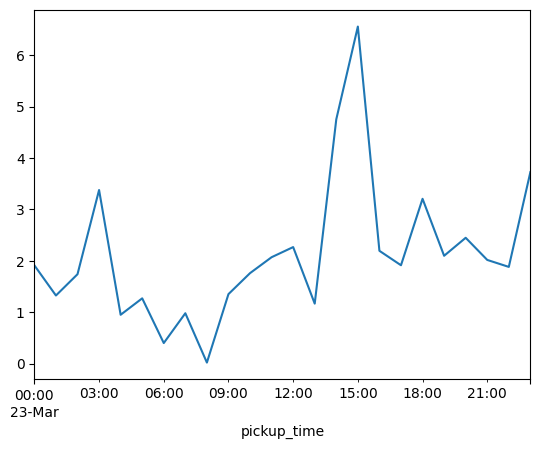

In [77]:
df_means['distance'].plot()

**43.** Overall, do riders travel further or less far as the day progresses?

riders travel farther as the time progresses

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [79]:
df_means['tip_by_percent']=df_means['tip']/df_means['fare']*100

**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [91]:
df_means['time_interval']=range(len(df_means))
print(df_means)

                     passengers  distance       fare       tip     tolls  \
pickup_time                                                                
2019-03-23 00:00:00    1.000000  1.911667   8.583333  1.415000  0.000000   
2019-03-23 01:00:00    1.250000  1.325000   7.875000  1.525000  0.000000   
2019-03-23 02:00:00    1.727273  1.739091   8.181818  1.641818  0.000000   
2019-03-23 03:00:00    1.500000  3.377500  11.750000  2.410000  0.000000   
2019-03-23 04:00:00    2.000000  0.950000   5.500000  0.915000  0.000000   
2019-03-23 05:00:00    2.000000  1.270000   6.000000  0.980000  0.000000   
2019-03-23 06:00:00    1.000000  0.400000  21.500000  0.000000  0.000000   
2019-03-23 07:00:00    2.333333  0.980000   5.250000  1.165000  0.000000   
2019-03-23 08:00:00    1.000000  0.020000   2.500000  0.000000  0.000000   
2019-03-23 09:00:00    1.500000  1.352000   7.400000  1.674000  0.000000   
2019-03-23 10:00:00    1.000000  1.760000   8.750000  0.727500  0.000000   
2019-03-23 1

Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [92]:
print(df_means['tip_by_percent'].corr(df_means['distance']))
print(df_means['tip_by_percent'].corr(df_means['passengers']))
print(df_means['tip_by_percent'].corr(df_means['time_interval']))


0.00953302789086911
0.32623184018268747
-0.23239795213315184


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

tip_by_percent and passengers relatively show strong correlation

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

it is false as the correlation is negative